In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#### *Problem Statement for Netflix Dataset*
“The objective of this project is to perform EDA on Netflix data to understand content distribution,
growth trends, genre popularity, and regional contributions, and to extract business insights.”

#### About the Dataset:
- Netflix is one of the most popular video streaming platforms with over 200M subscribers worldwide (as of mid-2021).
- This dataset contains information about movies and TV shows available on Netflix, including details such as
- title, type, cast, director, country, rating, release year, duration, genre, and date added.
- It is useful for analyzing content trends, platform growth, and regional contributions.

#### STEP 1: Data Exploration

In [3]:
# Load the dataset
df=pd.read_csv("netflix_titles.csv")

In [4]:
# Display first 5 rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
# shape of dataset
df.shape

(8807, 12)

In [6]:
# column names
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [7]:
# basic info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [8]:
# Statistical summary for numerical columns
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [9]:
# missing values
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [10]:
# Check number of unique values in each column
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [11]:
# Random sample to understand data better
df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7009,s7010,Movie,House at the End of the Street,Mark Tonderai,"Gil Bellows, Max Thieriot, Jennifer Lawrence, ...","United States, Canada","May 8, 2020",2012,PG-13,101 min,"Horror Movies, Thrillers",Moving to a new town proves even more stressfu...
5944,s5945,Movie,Hard Lessons,Eric Laneuville,"Denzel Washington, Lynn Whitfield, Richard Mas...",United States,"October 1, 2011",1986,TV-14,94 min,Dramas,This drama based on real-life events tells the...
112,s113,Movie,Worth,Sara Colangelo,"Michael Keaton, Stanley Tucci, Amy Ryan, Shuno...",NaN,"September 3, 2021",2021,PG-13,119 min,Dramas,"In the wake of the Sept. 11 attacks, a lawyer ..."
7465,s7466,Movie,Miss Julie,Liv Ullmann,"Jessica Chastain, Colin Farrell, Samantha Mort...","Norway, United Kingdom, France, Ireland","September 2, 2015",2014,PG-13,130 min,"Dramas, International Movies","On a summer night in 1890 Ireland, the unsettl..."
5558,s5559,TV Show,Bottersnikes & Gumbles,NaN,"Jason Callender, Kathryn Drysdale, Akiya Henry...","United States, United Kingdom, Australia","March 24, 2017",2017,TV-Y7,2 Seasons,"British TV Shows, Kids' TV",The fun-loving Gumbles bounce and play while s...


In [12]:
# In Step 1, we performed an initial exploration of the Netflix dataset to understand its structure, size, data types, and missing values. 
# This step is crucial because it helps identify data quality issues and prepares the dataset for further cleaning and analysis

#### STEP 2: Data Cleaning

In [13]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [14]:
# Filling missing values for categorical columns
categorical_cols = ['director', 'cast', 'country', 'rating']

for col in categorical_cols:
    df[col] = df[col].fillna("Unknown")

In [15]:
# Converted string dates into datetime format.
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [16]:
# Check duplicate rows
df.duplicated().sum()

np.int64(0)

In [17]:
# Remove duplicates if any
df.drop_duplicates(inplace=True)

In [18]:
# Extract numeric value from duration
df['duration_numeric'] = df['duration'].str.extract('(\d+)').astype(float)

In [19]:
# Remove extra spaces
text_cols = ['title', 'director', 'cast', 'country', 'listed_in']

for col in text_cols:
    df[col] = df[col].str.strip()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           8807 non-null   object        
 1   type              8807 non-null   object        
 2   title             8807 non-null   object        
 3   director          8807 non-null   object        
 4   cast              8807 non-null   object        
 5   country           8807 non-null   object        
 6   date_added        8709 non-null   datetime64[ns]
 7   release_year      8807 non-null   int64         
 8   rating            8807 non-null   object        
 9   duration          8804 non-null   object        
 10  listed_in         8807 non-null   object        
 11  description       8807 non-null   object        
 12  duration_numeric  8804 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(10)
memory usage: 894.6+ KB

In [21]:
df.isnull().sum()

show_id              0
type                 0
title                0
director             0
cast                 0
country              0
date_added          98
release_year         0
rating               0
duration             3
listed_in            0
description          0
duration_numeric     3
dtype: int64

In [22]:
df[df['duration'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_numeric
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi...",NaN
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...,NaN
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...,NaN


In [23]:
# Drop rows where duration is missing
df = df.dropna(subset=['duration','duration_numeric'])

In [24]:
# In Step 2, data cleaning was performed to improve data quality. Missing values in categorical columns were handled by replacing them with “Unknown”. 
# The date_added column was converted into a proper datetime format. 
# Duplicate records were removed, text columns were standardized, and the duration column was transformed into a numerical format for better analysis
# This ensured the dataset was accurate and ready for EDA.

#### STEP 3: Feature Engineering

In [25]:
# Extract year and month from date_added
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['month_name_added'] = df['date_added'].dt.month_name()

In [27]:
# Created movie duration and tv show seasons columns
df['movie_duration_min'] = df.apply(
    lambda x: x['duration_numeric'] if x['type'] == 'Movie' else np.nan, axis=1)

df['tv_show_seasons'] = df.apply(
    lambda x: x['duration_numeric'] if x['type'] == 'TV Show' else np.nan, axis=1)

In [30]:
# How fast Netflix acquires content
# Whether Netflix focuses more on new or old content?
df['content_age_when_added'] = df['year_added'] - df['release_year']

In [32]:
# Create list columns
df['country_list'] = df['country'].str.split(', ')
df['genre_list'] = df['listed_in'].str.split(', ')

In [34]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,description,duration_numeric,year_added,month_added,month_name_added,movie_duration_min,tv_show_seasons,content_age_when_added,country_list,genre_list
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,...,"As her father nears the end of his life, filmm...",90.0,2021.0,9.0,September,90.0,NaN,1.0,[United States],[Documentaries]
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,...,"After crossing paths at a party, a Cape Town t...",2.0,2021.0,9.0,September,NaN,2.0,0.0,[South Africa],"[International TV Shows, TV Dramas, TV Mysteries]"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,...,To protect his family from a powerful drug lor...,1.0,2021.0,9.0,September,NaN,1.0,0.0,[Unknown],"[Crime TV Shows, International TV Shows, TV Ac..."
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,...,"Feuds, flirtations and toilet talk go down amo...",1.0,2021.0,9.0,September,NaN,1.0,0.0,[Unknown],"[Docuseries, Reality TV]"
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,...,In a city of coaching centers known to train I...,2.0,2021.0,9.0,September,NaN,2.0,0.0,[India],"[International TV Shows, Romantic TV Shows, TV..."


In [35]:
df[['type','duration','movie_duration_min','tv_show_seasons']].sample(5)

,type,duration,movie_duration_min,tv_show_seasons
3681,Movie,105 min,105.0,NaN
8430,Movie,104 min,104.0,NaN
1728,Movie,148 min,148.0,NaN
5457,TV Show,1 Season,NaN,1.0
2548,TV Show,1 Season,NaN,1.0


In [36]:
# In Step 3, feature engineering was performed to create meaningful variables from existing data. 
# Year and month were extracted from the date_added column to analyze temporal trends. 
# The duration column was separated into movie duration (in minutes) and TV show seasons to allow independent analysis. 
# Additionally, content age was calculated to understand how quickly content was added to Netflix after its release. 
# Multi-valued fields such as country and genre were transformed into list formats to support advanced exploratory analysis.

#### STEP 4: EDA (Exploratory Data Analysis)

- Movies vs TV Shows Count

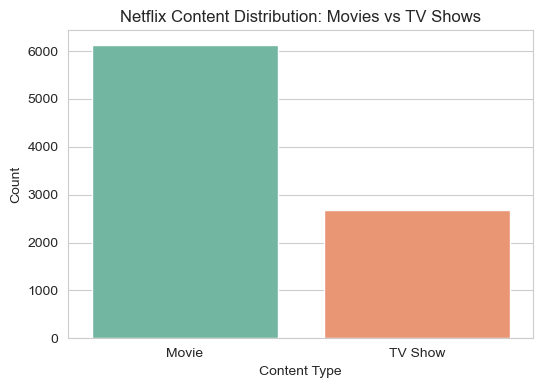

In [57]:
sns.set_style("whitegrid")
type_counts = df['type'].value_counts().reset_index()
type_counts.columns = ['type', 'count']

plt.figure(figsize=(6,4))
sns.barplot(x='type', y='count',hue='type',data=type_counts, palette='Set2')
plt.title("Netflix Content Distribution: Movies vs TV Shows")
plt.xlabel("Content Type")
plt.ylabel("Count")
plt.show()

- Content Added Over the Years

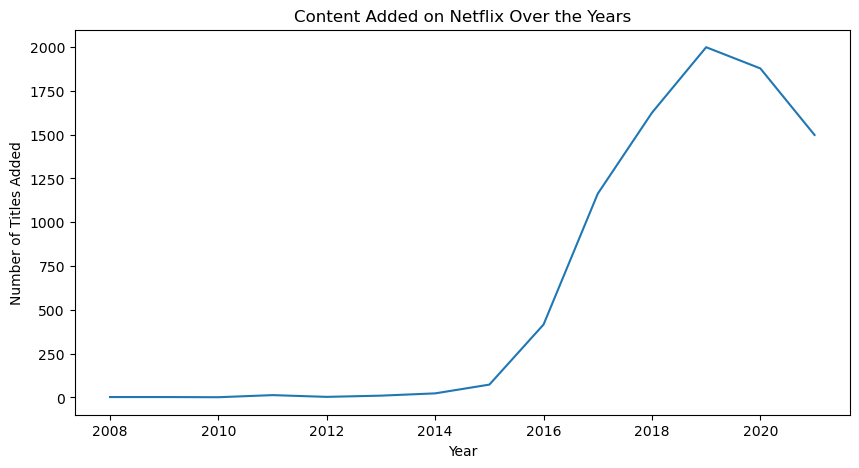

In [40]:
yearly_content = df['year_added'].value_counts().sort_index()

plt.figure(figsize=(10,5))
yearly_content.plot(kind='line')
plt.title("Content Added on Netflix Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles Added")
plt.show()

- Content Added by Year and Type

<Figure size 1000x500 with 0 Axes>

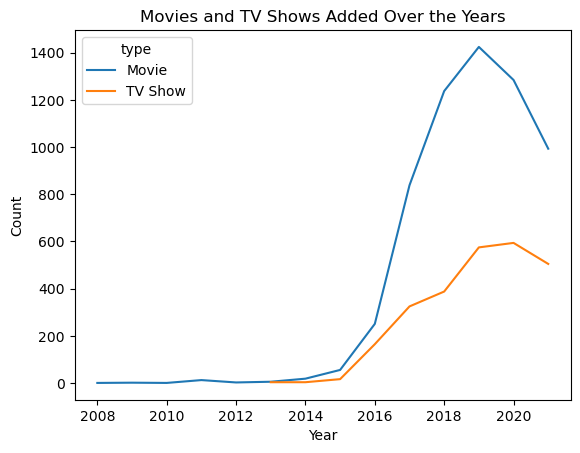

In [42]:
year_type = df.groupby(['year_added', 'type']).size().unstack()

plt.figure(figsize=(10,5))
year_type.plot(kind='line')
plt.title("Movies and TV Shows Added Over the Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

- Top 5 Countries Producing Content

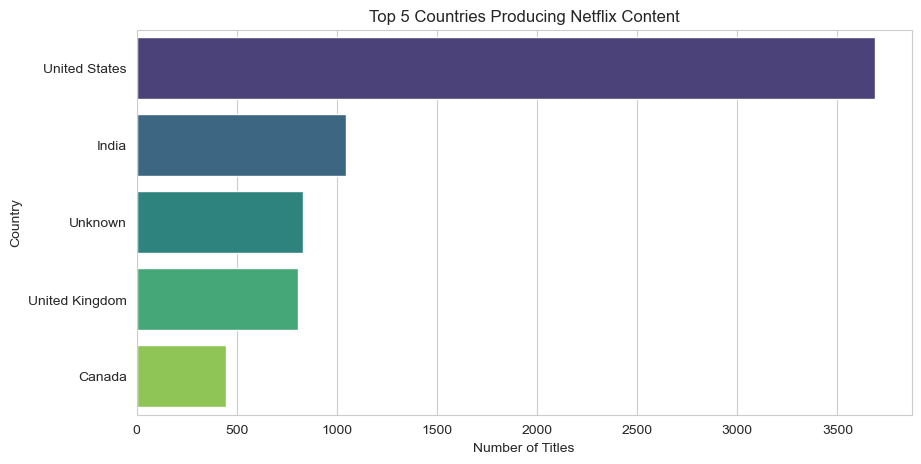

In [63]:
country_exploded = df.explode('country_list')
top_countries = country_exploded['country_list'].value_counts().head(5).reset_index()
top_countries.columns = ['country', 'count']

plt.figure(figsize=(10,5))
sns.barplot(x='count', y='country',hue='country',data=top_countries, palette='viridis')
plt.title("Top 5 Countries Producing Netflix Content")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

- Top 10 Genres on Netflix

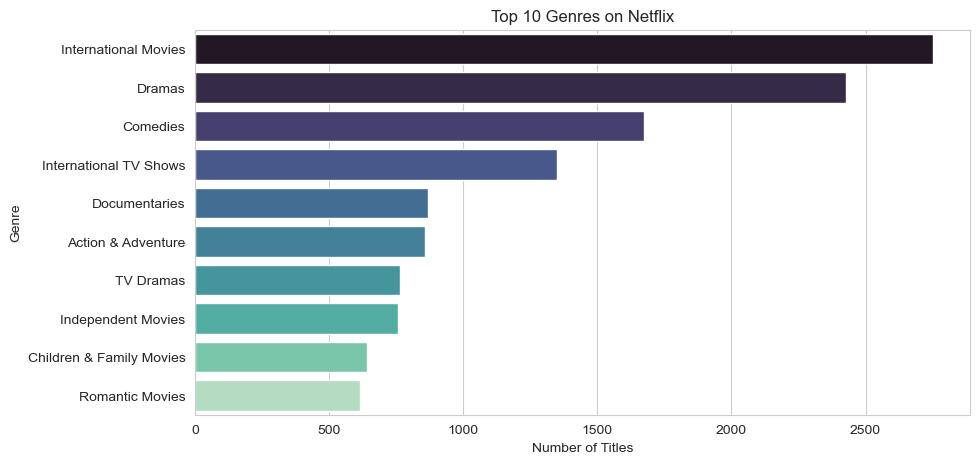

In [65]:
genre_exploded = df.explode('genre_list')
top_genres = genre_exploded['genre_list'].value_counts().head(10).reset_index()
top_genres.columns = ['genre', 'count']

plt.figure(figsize=(10,5))
sns.barplot(x='count', y='genre',hue='genre',data=top_genres, palette='mako')
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()

- Distribution of Movie Duration

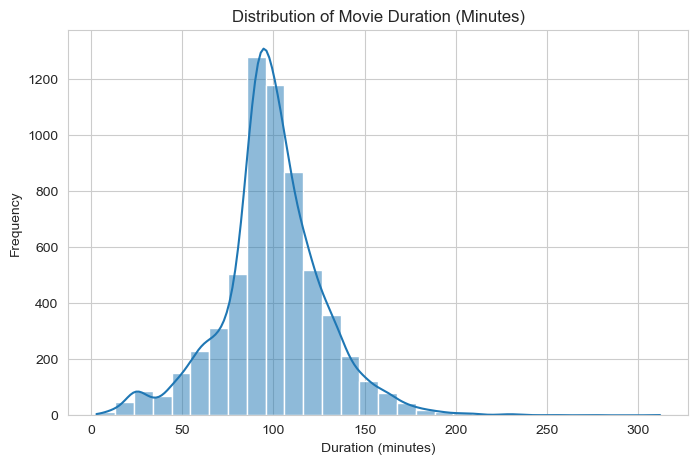

In [66]:
plt.figure(figsize=(8,5))
sns.histplot(df[df['type']=='Movie']['movie_duration_min'], bins=30, kde=True)
plt.title("Distribution of Movie Duration (Minutes)")
plt.xlabel("Duration (minutes)")
plt.ylabel("Frequency")
plt.show()

- Distribution of TV Show Seasons

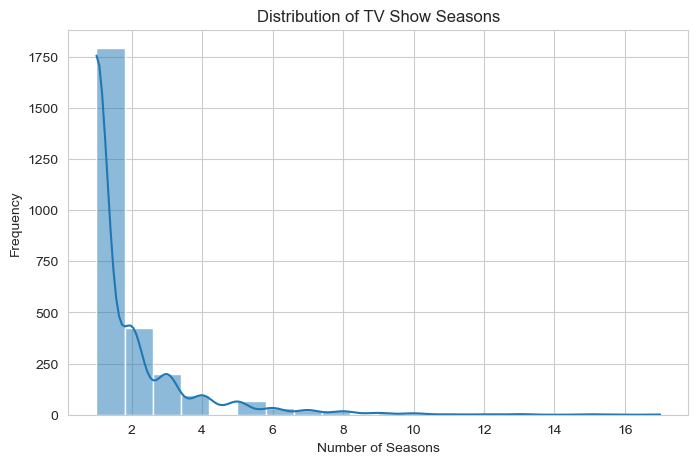

In [67]:
plt.figure(figsize=(8,5))
sns.histplot(df[df['type']=='TV Show']['tv_show_seasons'], bins=20, kde=True)
plt.title("Distribution of TV Show Seasons")
plt.xlabel("Number of Seasons")
plt.ylabel("Frequency")
plt.show()

- Content Age When Added

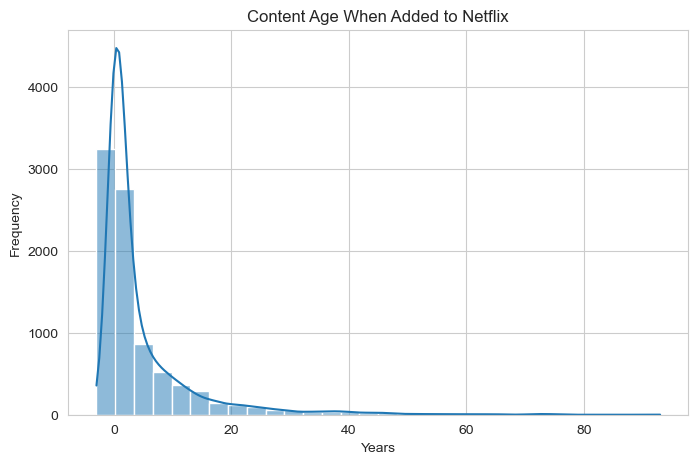

In [68]:
plt.figure(figsize=(8,5))
sns.histplot(df['content_age_when_added'], bins=30, kde=True)
plt.title("Content Age When Added to Netflix")
plt.xlabel("Years")
plt.ylabel("Frequency")
plt.show()

In [50]:
# In Step 4, Exploratory Data Analysis was performed to uncover trends and patterns in Netflix’s content library. 
# Visualizations were used to analyze content distribution, growth over time, country-wise and genre-wise dominance, movie durations, TV show seasons, 
# and content acquisition timing. These insights helped in understanding Netflix’s business strategy and content focus areas.

#### STEP 5: Business Insights & Recommendations

#### 1. Content Strategy Insight

From Movies vs TV Shows:

- Netflix has more Movies than TV Shows.

- But TV Shows create long-term engagement (subscriptions stay longer).

##### Business Insight:

- Netflix can increase investment in TV Shows to improve user retention and binge-watching behaviour.

##### Recommendation:

- Focus more on high-quality original TV series to build loyal subscribers.

#### 2. Growth Strategy Insight

From Content Added Over the Years:

- Massive growth after 2015.

- Shows aggressive platform expansion.

##### Business Insight:

- Netflix rapidly scaled its content library to compete globally.

##### Recommendation:

- Continue aggressive content acquisition, especially in regional markets.

#### 3. Regional Market Insight

From Top Countries Producing Content:

- The USA is the largest contributor of content.

- India and the UK are among the top contributors.

##### Business Insight:

- Netflix has strong dominance in a few key markets but also shows growing influence in regional content production.

##### Recommendation:

- Increase investment in emerging markets such as India, South Korea, and Spain.

- Promote local-language and culturally relevant content.

#### 4. Genre Preference Insight

From Top Genres on Netflix:

- Drama and International content dominate the platform.

- High audience preference for emotional and culturally diverse storytelling.

##### Business Insight:

- Netflix’s audience shows a strong inclination toward drama-driven and international content.

##### Recommendation:

- Increase production and acquisition of Drama and International genres.

- Use genre insights to improve personalised recommendations.

#### 5. Content Duration Insight

From Movie Duration Distribution:

- Most movies range between 80–120 minutes.

- Netflix follows standard industry norms for movie length.

##### Business Insight:

- Optimal movie duration helps maintain viewer engagement and satisfaction.

##### Recommendation:

- Continue producing movies within this duration range.

- Experiment with shorter films for mobile-first users.

#### 6. TV Show Seasons Insight

From TV Show Seasons Distribution:

- Most TV shows have 1–2 seasons.

- Limited series are more common than long-running shows.

##### Business Insight:

- Netflix prefers shorter series to minimize risk and maintain content freshness.

##### Recommendation:

- Expand successful shows into multi-season franchises.

- Use viewer engagement metrics before discontinuing shows.

#### 6. TV Show Seasons Insight

From TV Show Seasons Distribution:

- Most TV shows have 1–2 seasons.

- Limited series are more common than long-running shows.

##### Business Insight:

- Netflix prefers shorter series to minimize risk and maintain content freshness.

##### Recommendation:

- Expand successful shows into multi-season franchises.

- Use viewer engagement metrics before discontinuing shows.

#### STEP 6: Final Conclusion & Project Summary

### *Project Conclusion*

In this project, Exploratory Data Analysis (EDA) was performed on the Netflix dataset to understand content distribution, growth trends, genre popularity, and regional contributions. The analysis revealed that Netflix has experienced rapid expansion since 2015, with a strong dominance of movies over TV shows and a significant contribution from countries like the USA, India, and the UK. Drama and international genres emerged as the most popular categories, reflecting audience preferences for engaging and culturally diverse content. Additionally, Netflix prioritizes fresh content by adding titles shortly after their release and follows standard content duration practices to maintain viewer engagement.

#### *Key Takeaways*

- Netflix has aggressively expanded its content library after 2015.

- Movies dominate the platform, but TV shows play a key role in user retention.

- The USA, India, and the UK are major content contributors.

- Drama and International genres are the most popular.

- Most movies range between 80–120 minutes.

- TV shows usually have 1–2 seasons.

- Netflix focuses on adding relatively new content.